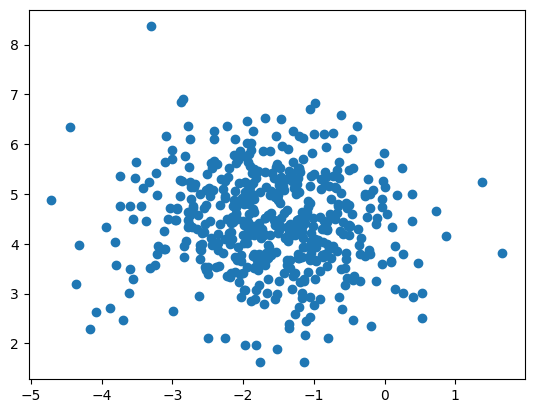

[[-0.64805541  0.9709791 ]
 [-0.8735218  -2.28509123]
 [-0.91928224  1.03455863]
 [ 0.62168618 -0.80920364]
 [-0.98234223 -0.10391148]]
[[-0.5551366   0.83175919]
 [-0.35706987 -0.93407768]
 [-0.66423247  0.74752607]
 [ 0.60923156 -0.79299237]
 [-0.99445189 -0.10519243]]


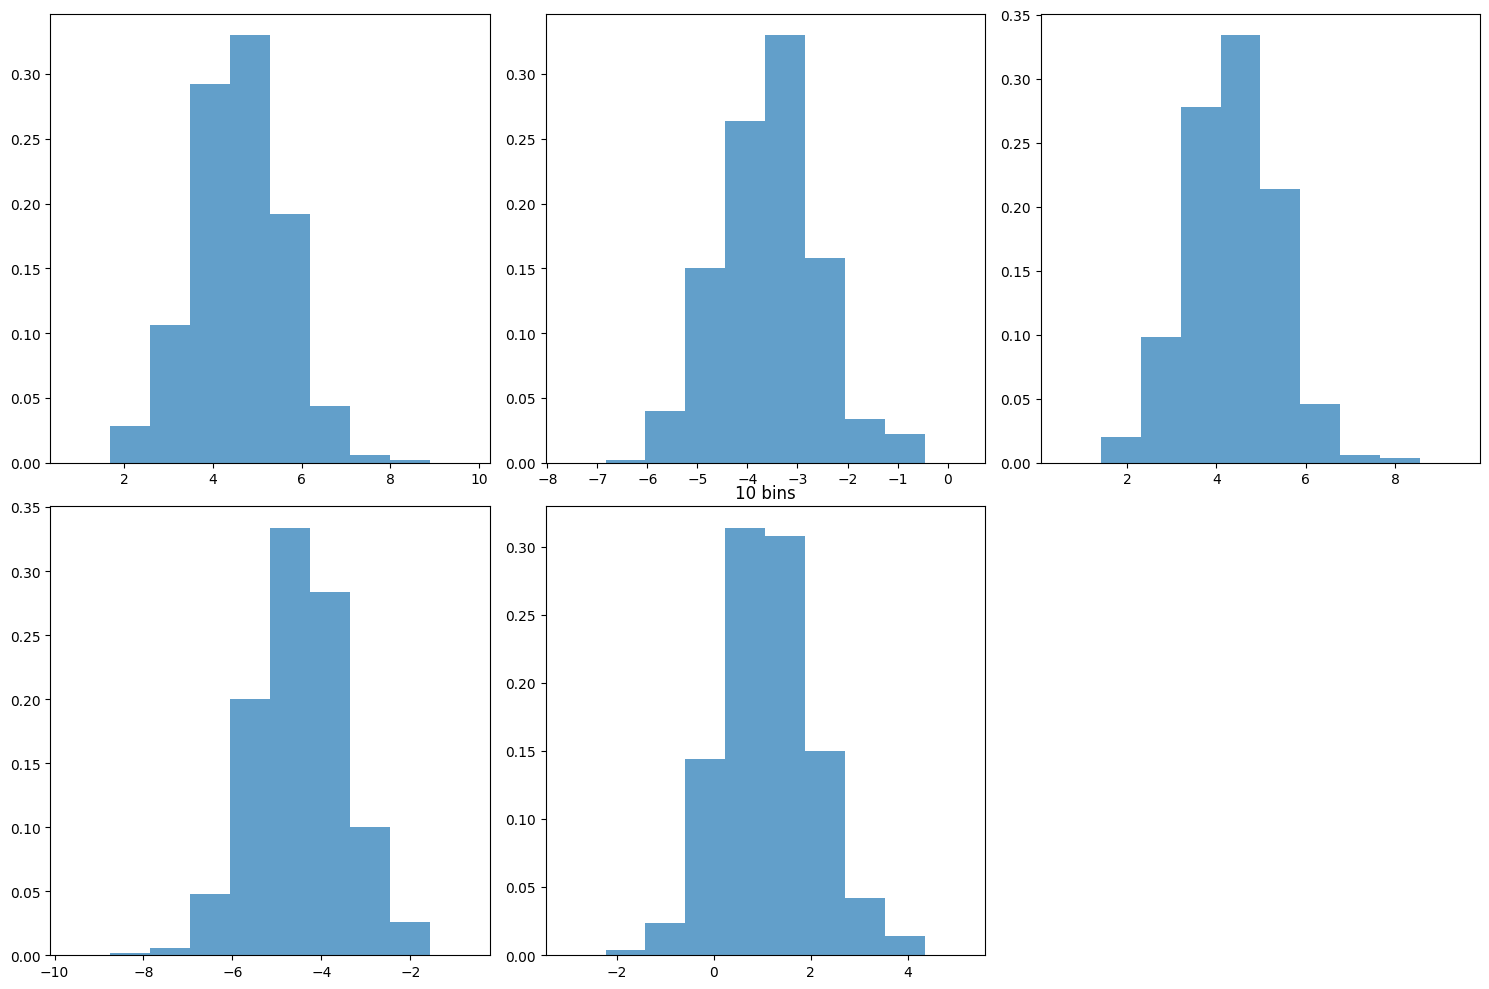

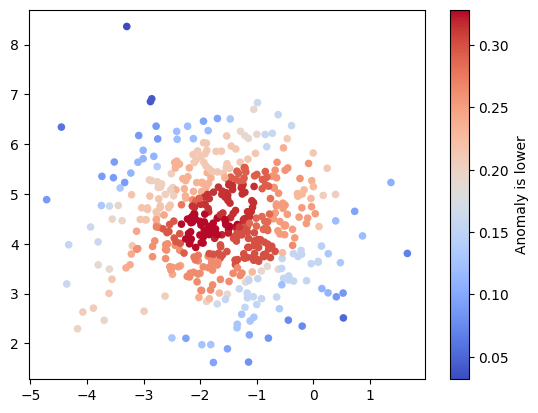

bins: 10


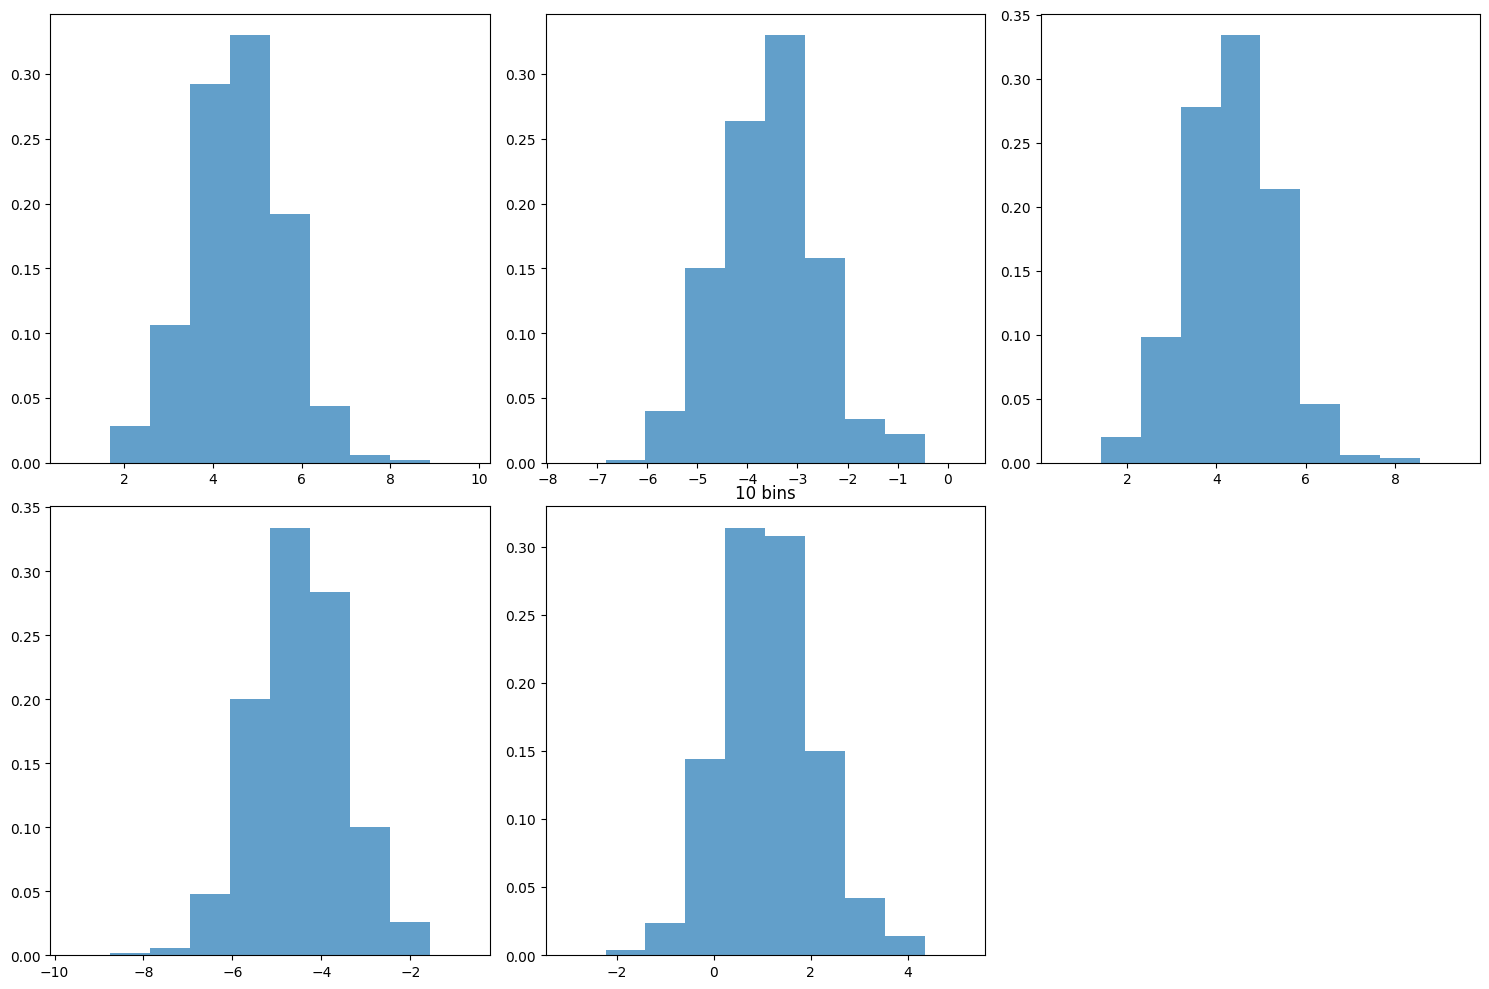

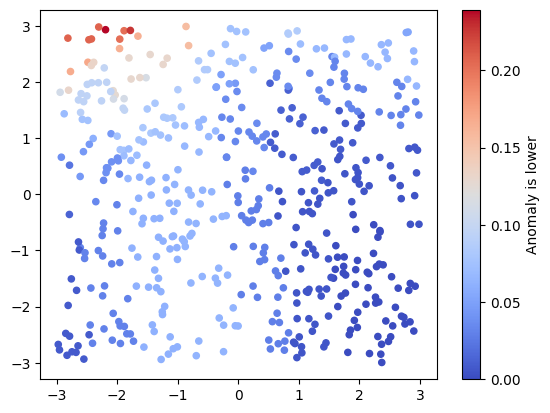

bins: 40


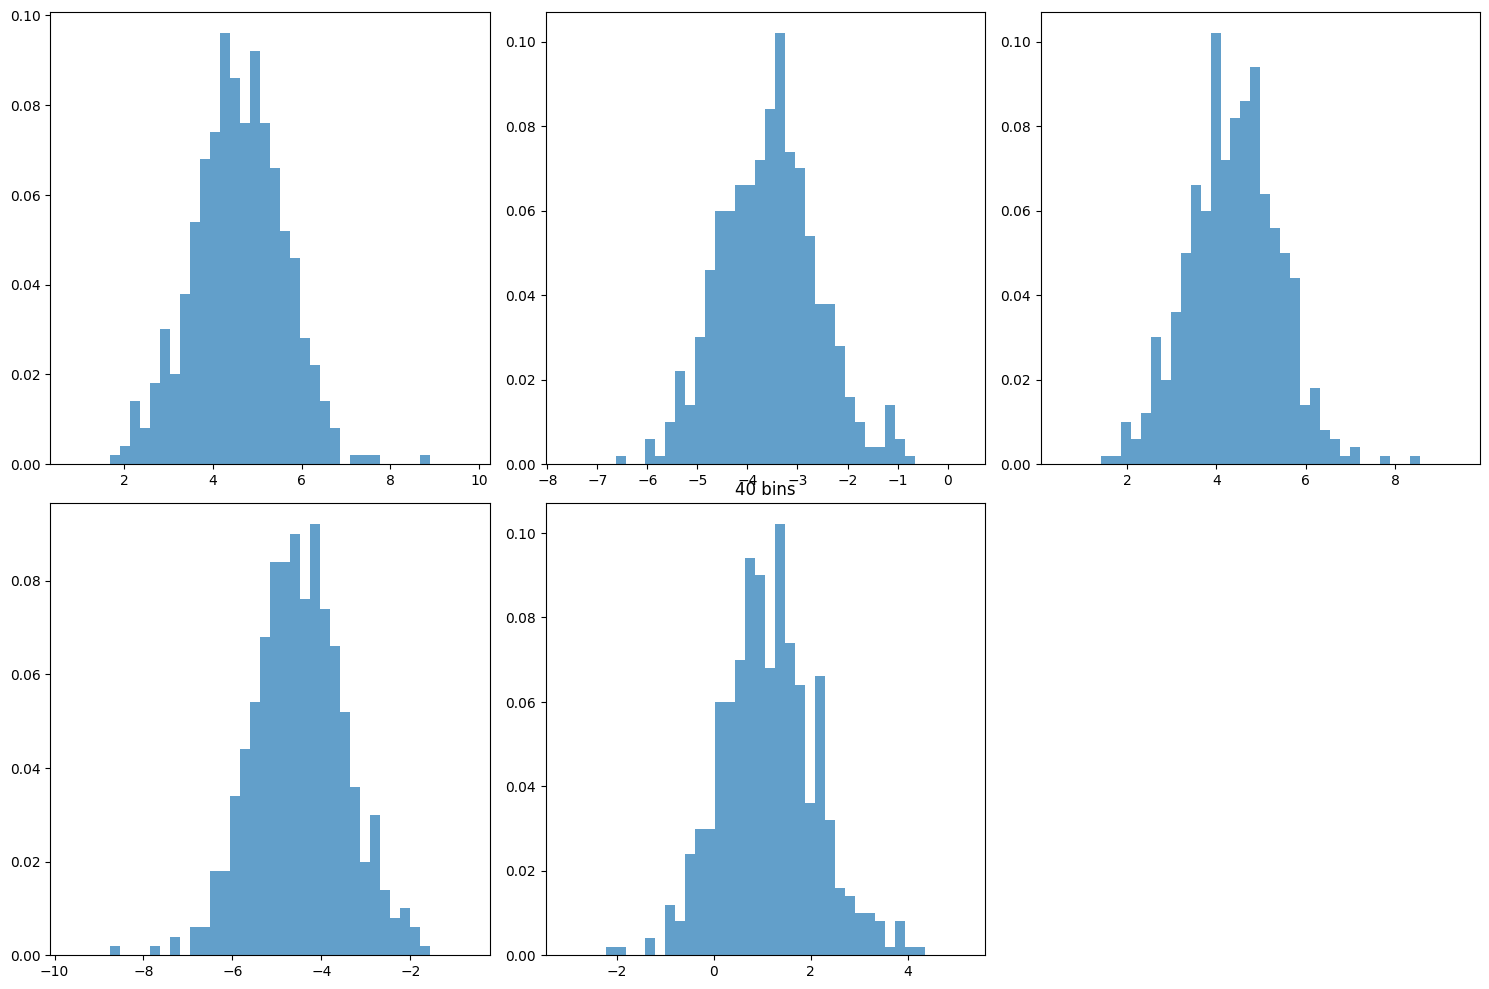

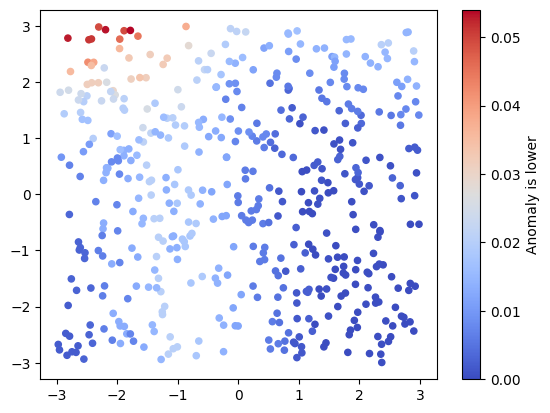

bins: 90


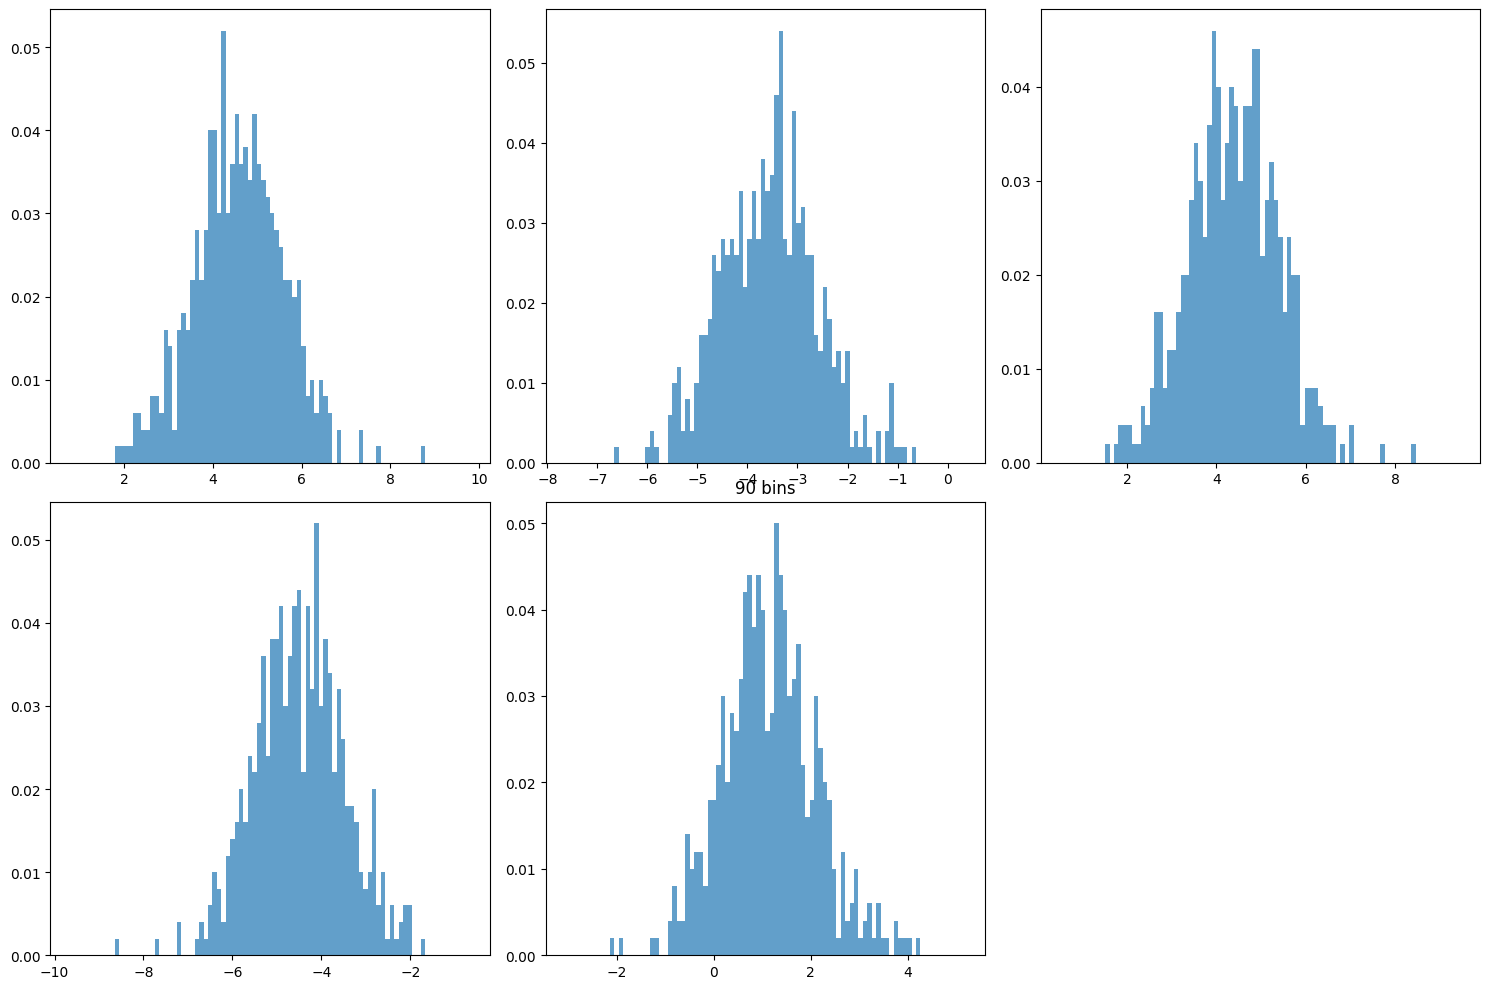

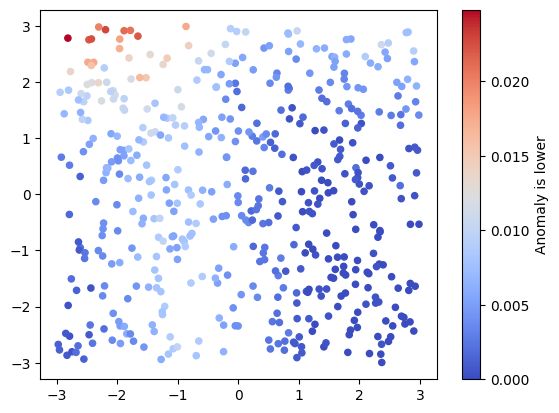

bins: 150


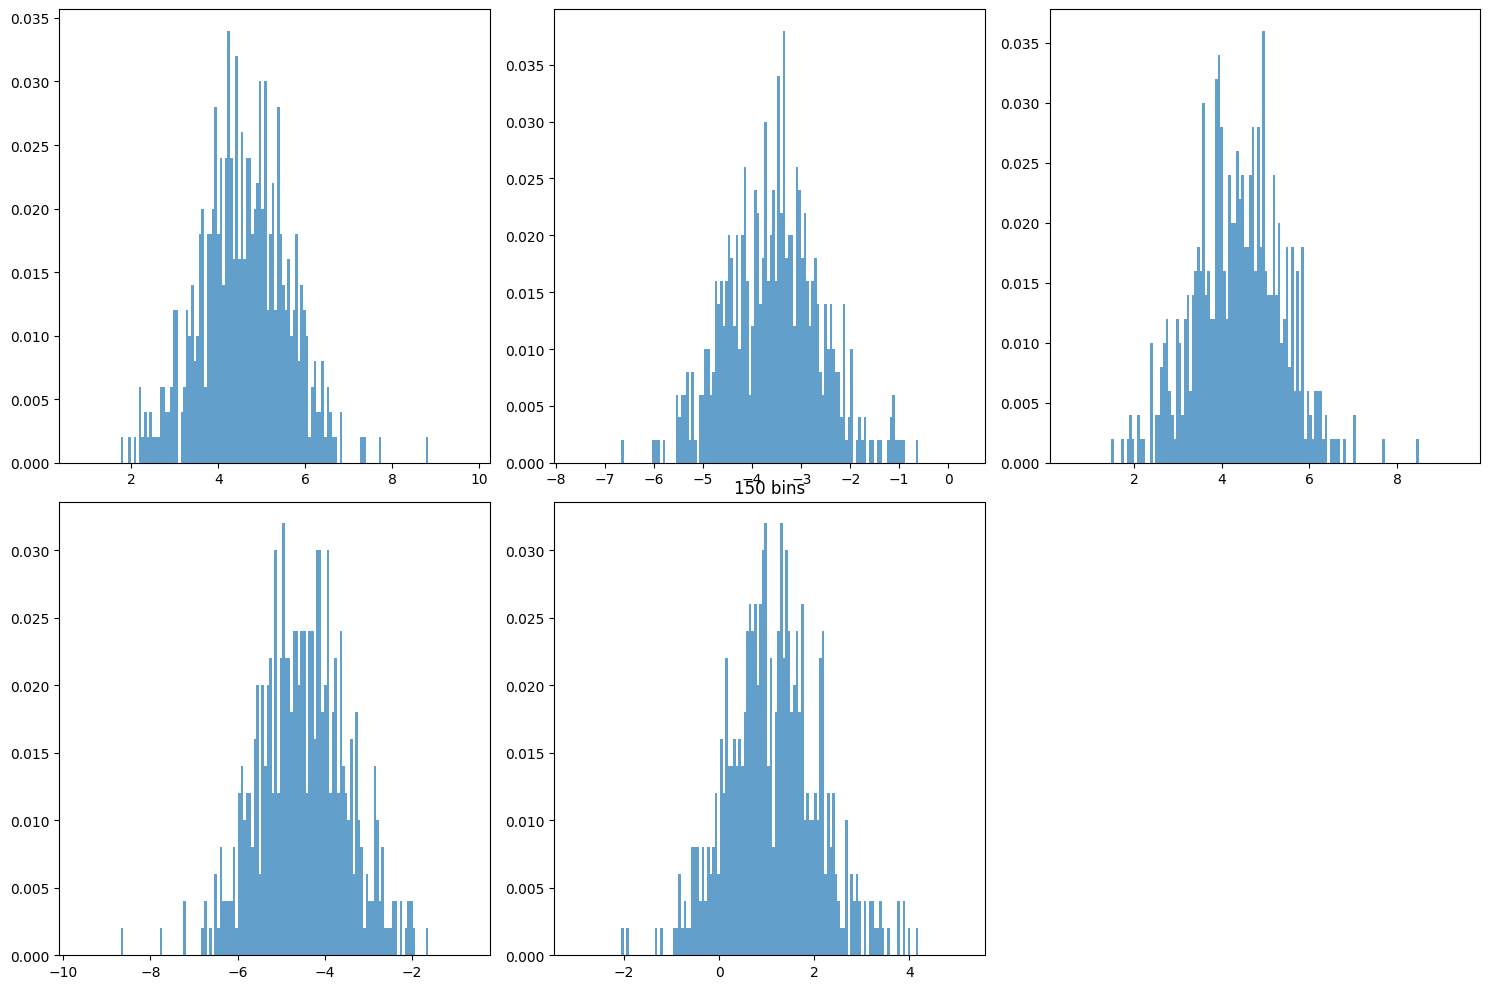

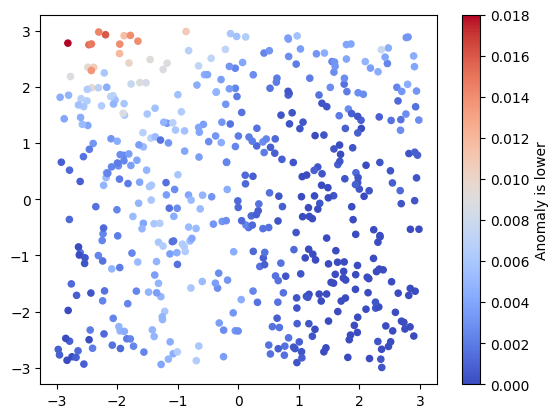

bins: 200


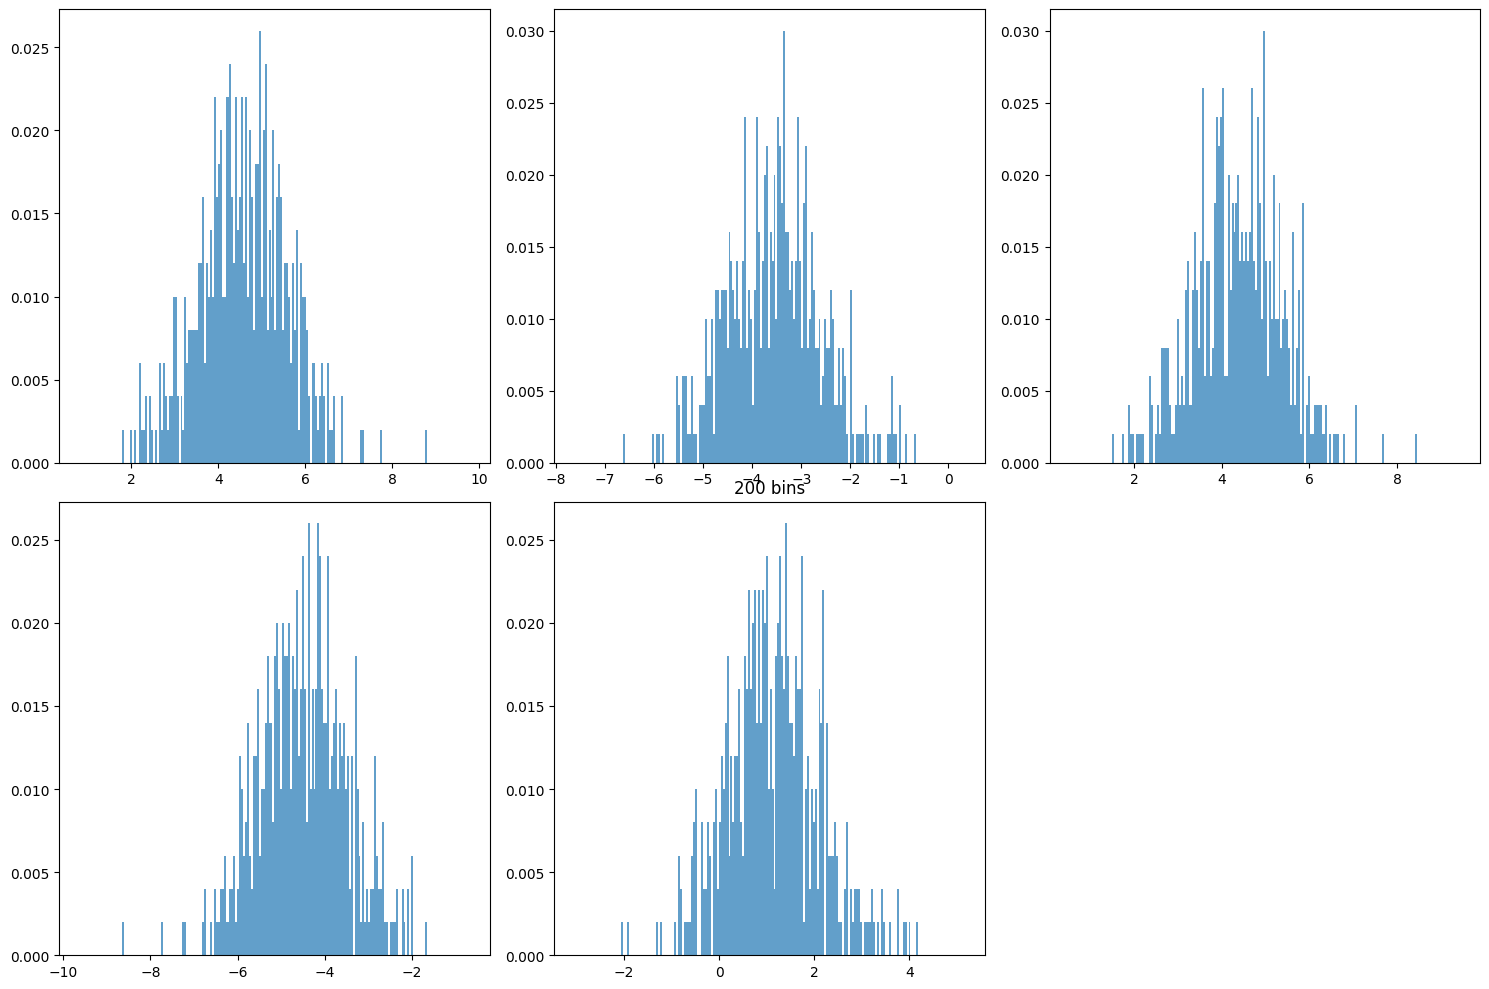

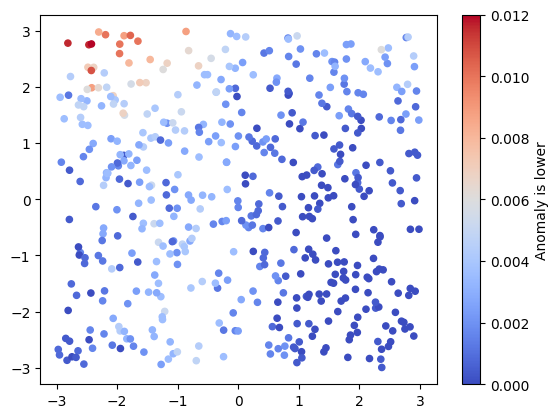

In [1]:
# 1. In the first exercise you will design a simpler variant of LODA. First you
# will generate a 2D dataset that follows a standard normal distribution
# (500 points) using sklearn.datasets.make blobs.
# 2. Then you will randomly generate 5 unit-length projection vectors (you
# can use numpy.random.multivariate normal with (0, 0) mean and
# identity matrix as covariance matrix) that will be used to generate 1D
# histograms (for the projected values). You will compute the corresponding histograms with equal-width bins using numpy.histogram (for the
# range parameter use a larger interval than the range of the projected values). For each histogram compute the probability corresponding to each
# bin and use them to compute the anomaly score of a sample as the mean
# of the probabilities (corresponding to each histogram).
# 3. For testing, generate a dataset with 500 points from a uniform distribution
# (between -3 and 3 using np.random.uniform). Plot the points in the
# test dataset using a colormap (related to the anomaly scores).
# 4. Use different number of bins and see how this affects the score map.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#1
X_train, _ = make_blobs(n_samples=500, centers=1, cluster_std=1.0, random_state=1)

plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

#2
projections = np.random.multivariate_normal(mean=[0, 0], cov=np.eye(2), size=5)
print(projections)
projections /= np.linalg.norm(projections, axis=1, keepdims=True)

print(projections)

num_bins = 10
def get_histo_bins(num_bins):
    histograms = []
    bin_edges_list = []

    for w in projections:
        projected = X_train @ w
        data_min, data_max = projected.min(), projected.max()
        data_range = (data_min - 1, data_max + 1)

        hist, bin_edges = np.histogram(projected, bins=num_bins, range=data_range, density=False)
        probs = hist / hist.sum()
        
        histograms.append(probs)
        bin_edges_list.append(bin_edges)

    return histograms, bin_edges_list

def anomaly_score(x, bin_edges_list, histograms):
    scores = []
    for i, w in enumerate(projections):
        proj = x @ w
        bins = bin_edges_list[i]
        probs = histograms[i]

        bin_idx = np.digitize(proj, bins) - 1
        bin_idx = np.clip(bin_idx, 0, len(probs) - 1)
        scores.append(probs[bin_idx])
    return np.mean(scores)

def score_and_plot(num_bins, X_data, showHist=False):
    histograms, bin_edges_list = get_histo_bins(num_bins)

    if showHist:
        plt.figure(figsize=(15, 10))
        for i, (hist, bin_edges) in enumerate(zip(histograms, bin_edges_list)):
            plt.subplot(2, 3, i + 1)
            plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge', alpha=0.7)
        plt.tight_layout()
        plt.title(f'{num_bins} bins')
        plt.show()

    scores = np.array([anomaly_score(x, bin_edges_list, histograms) for x in X_data])

    plt.scatter(X_data[:, 0], X_data[:, 1], c=scores, cmap='coolwarm', s=20)
    plt.colorbar(label='Anomaly is lower')
    plt.show()

score_and_plot(num_bins, X_train, True)

X_test = np.random.uniform(-3, 3, size=(500, 2))

for num_bins in [10, 40, 90, 150, 200]:
    print(f"bins: {num_bins}")
    score_and_plot(num_bins, X_test, True)

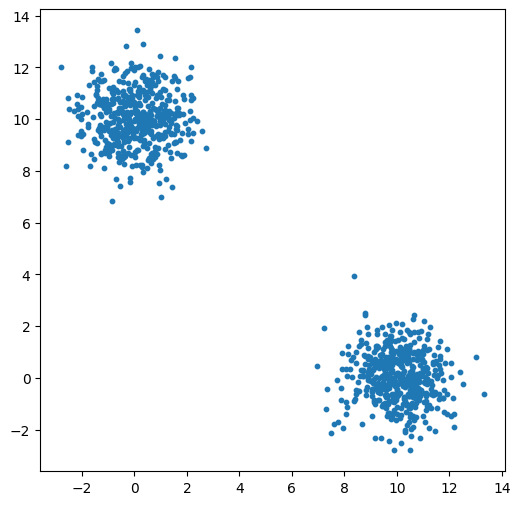

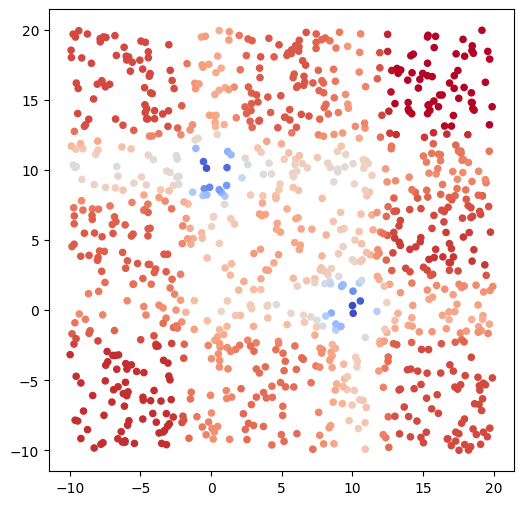

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Use

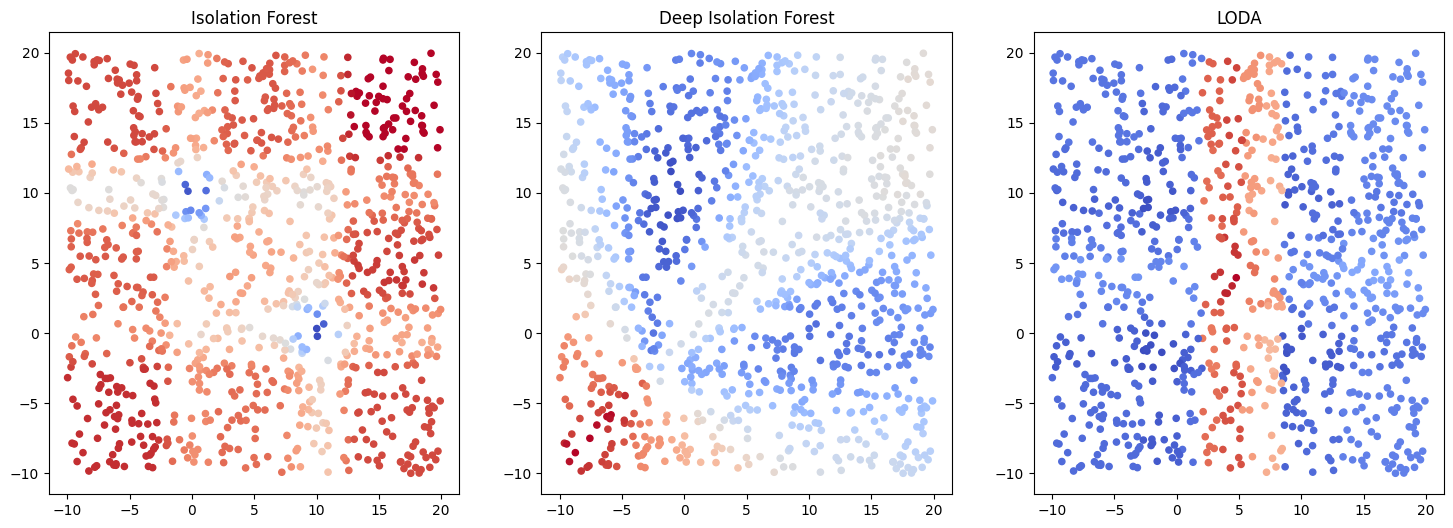

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Use

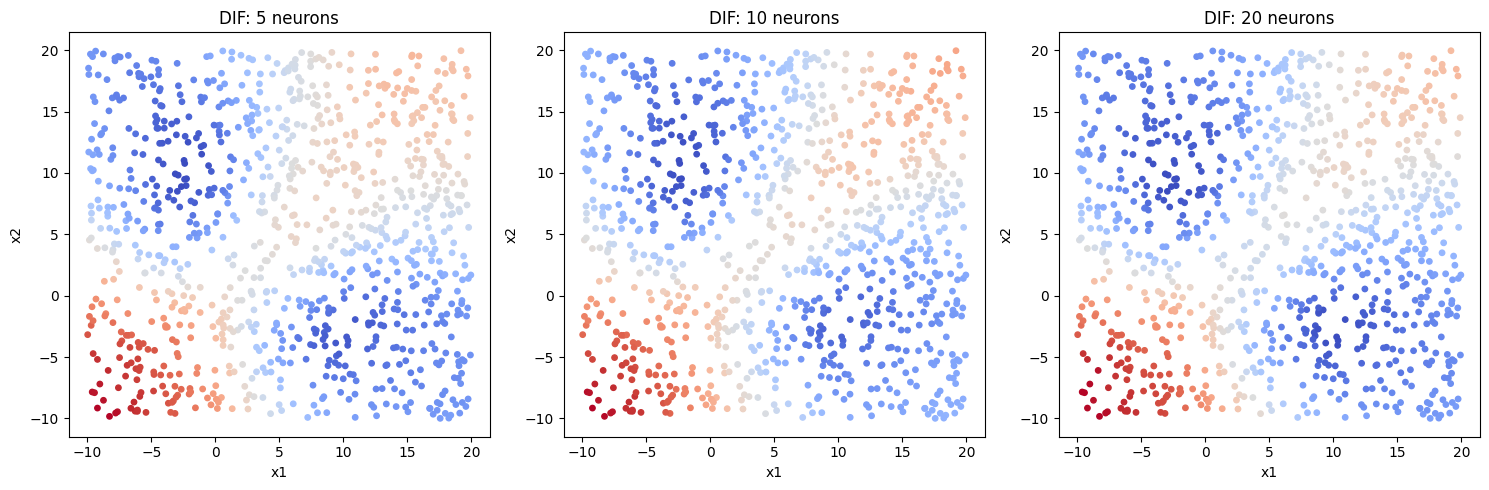

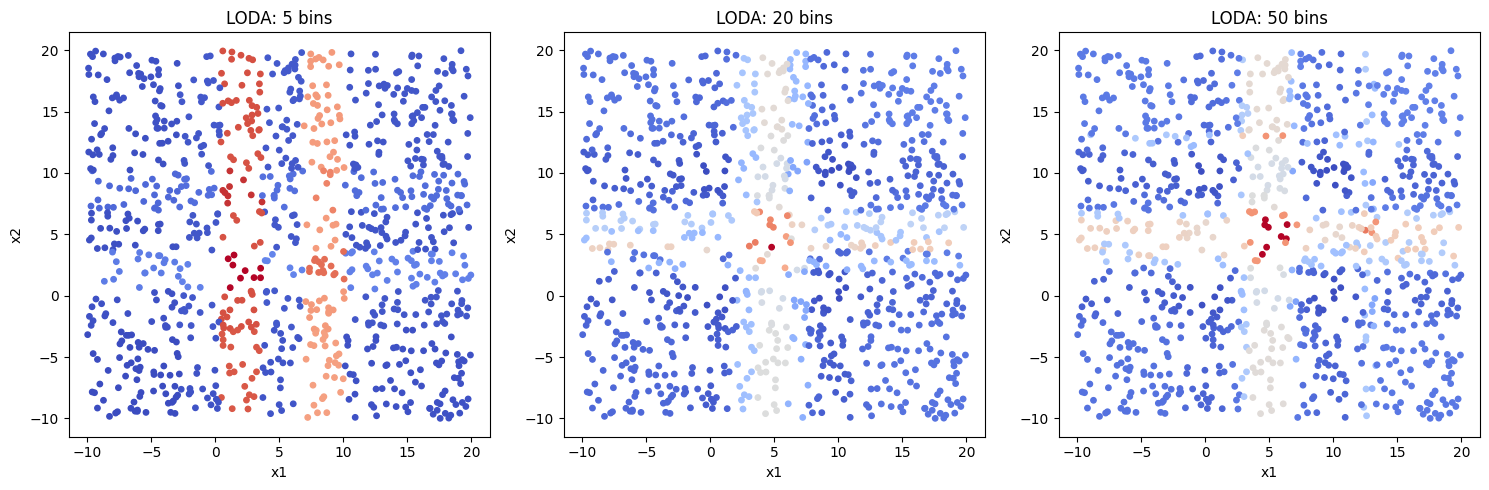

In [7]:
# Ex. 2
# 1. In this exercise we will try to see how the standard Isolation Forest algorithm introduces some artifacts when computing the anomaly scores.
# You will generate 2 clusters of 2-dimensional data using make blobs()
# function. The 2 clusters will have (10, 0) and (0, 10) as centers, 1 as
# standard deviation and 500 samples each.
# 2. You will fit an IForest model (from pyod.models.iforest) using this
# data (and a contamination rate of 0.02). Test data will be generated from
# a uniform distribution over the interval (-10, 20) using np.random.uniform
# and will contain 1000 samples.
# 3. Find the anomaly scores for the test data and plot the samples using a colormap (related to the anomaly scores). Observe the artefacts introduced
# by the axis-parallel separating hyperplanes used by standard IForest.
# 4. Repeat the same procedure for Deep Isolation Forest model (DIF from
# pyod.models.dif) and LODA (from pyod.models.loda) and use 3 subplots for the 3 figures.
# 5. Try different number of neurons for the hidden layers used by DIF and
# different number of bins for LODA. Try to explain why the score maps
# for LODA look that way.
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA

# 1
X, _ = make_blobs(
    n_samples=1000,
    centers=[[10, 0], [0, 10]],
    cluster_std=1.0,
    random_state=1
)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show()

# 2
model_if = IForest(contamination=0.02, random_state=1)
model_if.fit(X)

test = np.random.uniform(-10, 20, size=(1000, 2))
scores_if = model_if.decision_function(test)

# 3
plt.figure(figsize=(6, 6))
plt.scatter(test[:, 0], test[:, 1], c=scores_if, cmap='coolwarm', s=20)
plt.show()

# 4
model_dif = DIF(contamination=0.02, random_state=1)
model_dif.fit(X)
scores_dif = model_dif.decision_function(test)

model_loda = LODA(contamination=0.02, n_bins=10)
model_loda.fit(X)
scores_loda = model_loda.decision_function(test)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(test[:, 0], test[:, 1], c=scores_if, cmap='coolwarm', s=20)
plt.title('Isolation Forest')

plt.subplot(1, 3, 2)
plt.scatter(test[:, 0], test[:, 1], c=scores_dif, cmap='coolwarm', s=20)
plt.title('Deep Isolation Forest')

plt.subplot(1, 3, 3)
plt.scatter(test[:, 0], test[:, 1], c=scores_loda, cmap='coolwarm', s=20)
plt.title('LODA')

plt.show()

# 5
plt.figure(figsize=(15, 5))
for i, n_neurons in enumerate([5, 10, 20], start=1):
    model_dif = DIF(contamination=0.02, hidden_neurons=[n_neurons], random_state=1)
    model_dif.fit(X)
    scores_dif = model_dif.decision_function(test)

    plt.subplot(1, 3, i)
    plt.scatter(test[:, 0], test[:, 1], c=scores_dif, cmap='coolwarm', s=15)
    plt.title(f'DIF: {n_neurons} neurons')
    plt.xlabel('x1')
    plt.ylabel('x2')

plt.tight_layout()
plt.show()



plt.figure(figsize=(15, 5))
for i, n_bins in enumerate([5, 20, 50], start=1):
    model_loda = LODA(contamination=0.02, n_bins=n_bins)
    model_loda.fit(X)
    scores_loda = model_loda.decision_function(test)

    plt.subplot(1, 3, i)
    plt.scatter(test[:, 0], test[:, 1], c=scores_loda, cmap='coolwarm', s=15)
    plt.title(f'LODA: {n_bins} bins')
    plt.xlabel('x1')
    plt.ylabel('x2')

plt.tight_layout()
plt.show()


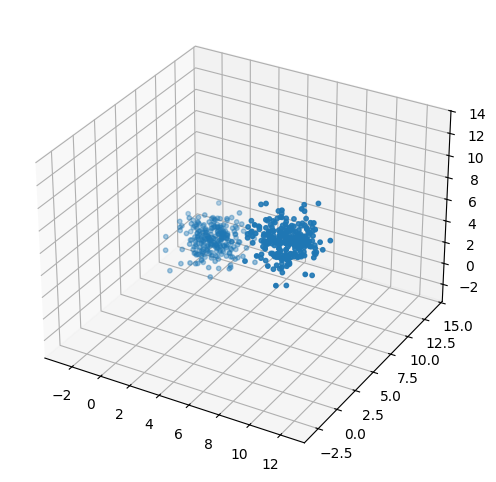

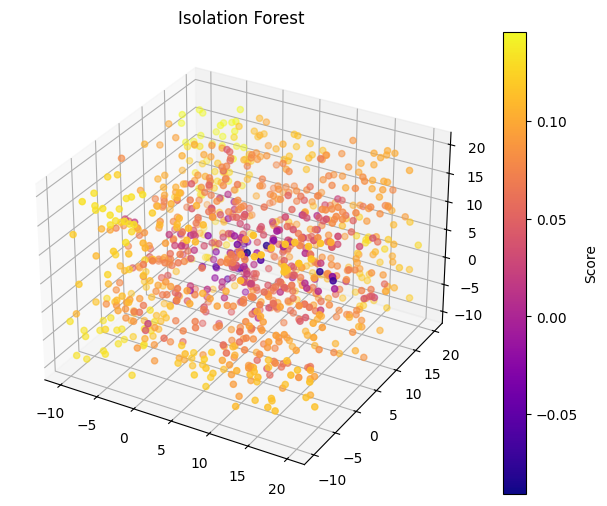

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Use

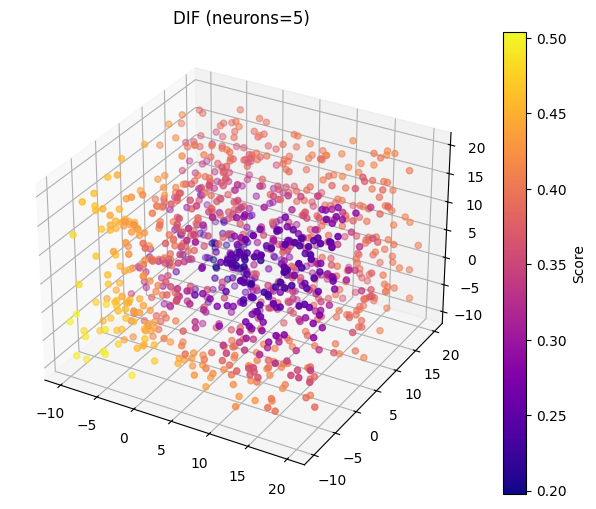

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Use

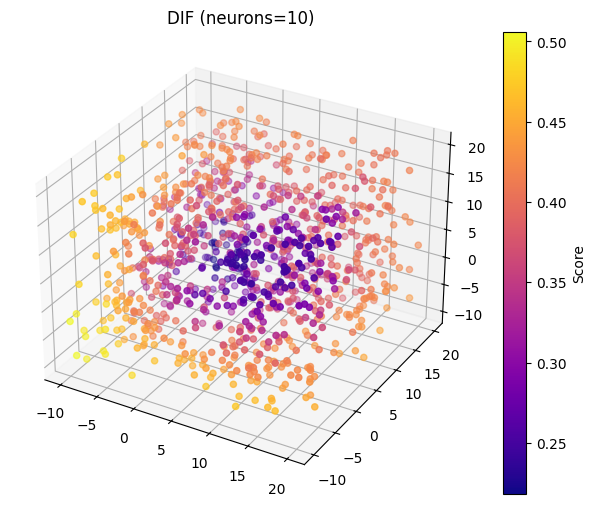

/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Use

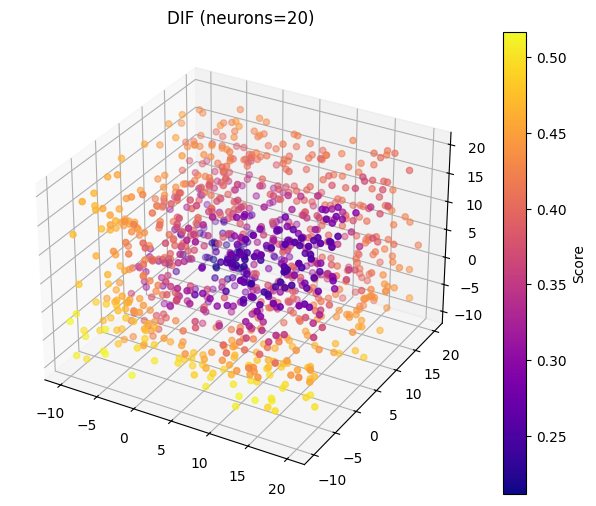

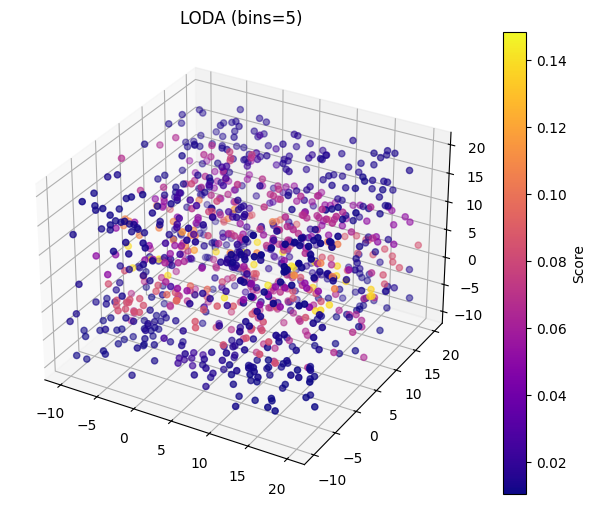

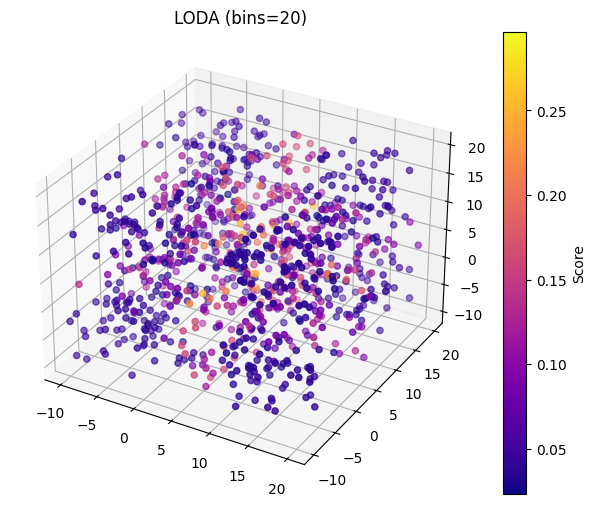

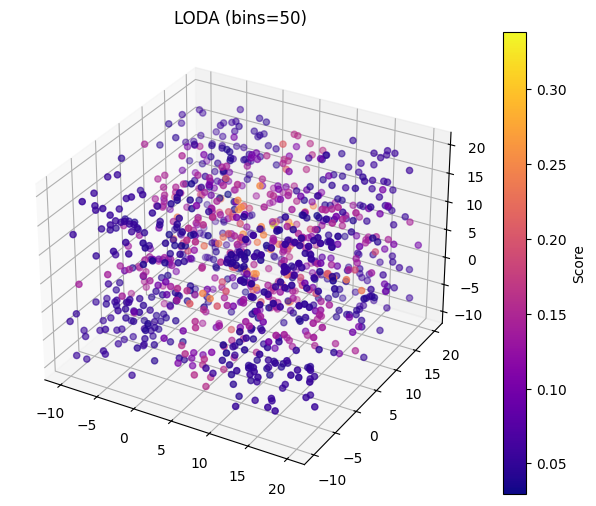

In [8]:
# 6. Redo all the steps in 3D (use (0, 10, 0) and (10, 0 , 10) as centers for
# the two clusters).
X3, _ = make_blobs(
    n_samples=500,
    centers=[[0, 10, 0], [10, 0, 10]],
    cluster_std=1.0,
    random_state=1
)

test3 = np.random.uniform(-10, 20, size=(1000, 3))
plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], s=10)
plt.show()

model_if3 = IForest(contamination=0.02, random_state=1)
model_if3.fit(X3)
scores_if3 = model_if3.decision_function(test3)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(test3[:, 0], test3[:, 1], test3[:, 2], c=scores_if3, cmap='plasma')
fig.colorbar(p, ax=ax, label='Score')
plt.title('Isolation Forest')
plt.show()

model_dif3 = DIF(contamination=0.02, random_state=1)
model_dif3.fit(X3)
scores_dif3 = model_dif3.decision_function(test3)

model_loda3 = LODA(contamination=0.02, n_bins=10)
model_loda3.fit(X3)
scores_loda3 = model_loda3.decision_function(test3)


for n in [5, 10, 20]:
    model = DIF(contamination=0.02, hidden_neurons=[n], random_state=1)
    model.fit(X3)
    scores = model.decision_function(test3)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(test3[:, 0], test3[:, 1], test3[:, 2], c=scores, cmap='plasma')
    fig.colorbar(p, ax=ax, label='Score')
    plt.title(f'DIF (neurons={n})')
    plt.show()

# LODA with varying bins
for b in [5, 20, 50]:
    model = LODA(contamination=0.02, n_bins=b)
    model.fit(X3)
    scores = model.decision_function(test3)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(test3[:, 0], test3[:, 1], test3[:, 2], c=scores, cmap='plasma')
    fig.colorbar(p, ax=ax, label='Score')
    plt.title(f'LODA (bins={b})')
    plt.show()


In [ ]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from pyod.models.iforest import IForest
from pyod.models.dif import DIF
from pyod.models.loda import LODA

data = loadmat("shuttle.mat")

X = data["X"]
y = data["y"].ravel()

print("Data shape:", X.shape)
print("Labels shape:", y.shape)

def evaluate_model(model_cls, model_kwargs, X_train, X_test, y_train, y_test):
    model = model_cls(**model_kwargs)
    model.fit(X_train)

    scores = model.decision_function(X_test)

    # more anomalous if they are high
    ba = balanced_accuracy_score(y_test, model.predict(X_test))
    roc = roc_auc_score(y_test, scores)

    return ba, roc


runs = 10

results = {
    "IForest": {"ba": [], "roc": []},
    "LODA": {"ba": [], "roc": []},
    "DIF": {"ba": [], "roc": []},
}

for i in range(runs):
    print("Run " + str(i + 1))
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=None, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # IF
    ba, roc = evaluate_model(
        IForest,
        {"contamination": 0.02, "random_state": 1},
        X_train, X_test, y_train, y_test,
    )
    results["IForest"]["ba"].append(ba)
    results["IForest"]["roc"].append(roc)

    # loda
    ba, roc = evaluate_model(
        LODA,
        {"contamination": 0.02},
        X_train, X_test, y_train, y_test,
    )
    results["LODA"]["ba"].append(ba)
    results["LODA"]["roc"].append(roc)

    # dif
    ba, roc = evaluate_model(
        DIF,
        {"contamination": 0.02, "random_state": 1},
        X_train, X_test, y_train, y_test,
    )
    results["DIF"]["ba"].append(ba)
    results["DIF"]["roc"].append(roc)

for name, metrics in results.items():
    mean_ba = np.mean(metrics["ba"])
    mean_roc = np.mean(metrics["roc"])
    print(f"{name}:  BA={mean_ba:.4f}   ROC AUC={mean_roc:.4f}")

Data shape: (49097, 9)
Labels shape: (49097,)


/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/mina/Documents/Master-1-S1/AD/venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
/Use

IForest:  BA=0.6351   ROC AUC=0.9961
LODA:  BA=0.5254   ROC AUC=0.9221
DIF:  BA=0.5005   ROC AUC=0.9656
